### IMPORTING NECESSARY LIBRARIES

In [1]:
## importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

### LOADING EXCEL FILE

In [2]:
## loading the excel file and storing it in df 
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

### BASIC DATASET CHECKING

In [3]:
df.head() ## checking first 5 rows

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [4]:
df.tail() ## checking last 5 rows

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON

In [5]:
print("Number of Rows",df.shape[0]) ## number of rows
print("Number of Columns",df.shape[1]) ## number of columns

Number of Rows 13611
Number of Columns 17


In [6]:
df.info() ## information about data (no. of rows, no. of columns, memory requirement and datatypes of each column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
df.describe().transpose() ## overall statistics about data

count          mean           std           min  \
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13611.0    320.141867     85.694186    183.601165   
MinorAxisLength  13611.0    202.270714     44.970091    122.512653   
AspectRation     13611.0      1.583242      0.246678      1.024868   
Eccentricity     13611.0      0.750895      0.092002      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13611.0      0.987143      0.004660      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13611.0      0.799864      0.061713      0.640577   
ShapeFactor1     13611.0      0.006564      0.001128      0.002778   
ShapeFactor2     13611.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           75%            max  
Area             36328.000000  44652.000000  61332.000000  254616.000000  
Perimeter          703.523500    794.941000    977.213000    1985.370000  
MajorAxisLength    253.303633    296.883367    376.495012     738.860153  
MinorAxisLength    175.848170    192.431733    217.031741     460.198497  
AspectRation         1.432307      1.551124      1.707109       2.430306  
Eccentricity         0.715928      0.764441      0.810466       0.911423  
ConvexArea       36714.500000  45178.000000  62294.000000  263261.000000  
EquivDiameter      215.068003    238.438026    279.446467     569.374358  
Extent               0.718634      0.759859      0.786851       0.866195  
Solidity             0.985670      0.988283      0.990013       0.994677  
roundness            0.832096      0.883157      0.916869       0.990685  
Compactness          0.762469      0.801277      0.834270       0.987303  
ShapeFactor1         0.005900      0.006645      0.007271       0.010451  
ShapeFactor2         0.001154      0.001694      0.002170       0.003665  
ShapeFactor3         0.581359      0.642044      0.696006       0.974767  
ShapeFactor4         0.993703      0.996386      0.997883       0.999733

In [8]:
df.duplicated().sum() ## checking for duplicate values if any

68

In [9]:
df.drop_duplicates(subset = None, keep = 'first', inplace = True) ## dropping duplicate values

In [10]:
df.duplicated().sum() ## checking after removing duplicate values

0

In [11]:
df.isnull().sum(axis=0).sort_values(ascending=False) ## cheking null values for columns

Area               0
Solidity           0
ShapeFactor4       0
ShapeFactor3       0
ShapeFactor2       0
ShapeFactor1       0
Compactness        0
roundness          0
Extent             0
Perimeter          0
EquivDiameter      0
ConvexArea         0
Eccentricity       0
AspectRation       0
MinorAxisLength    0
MajorAxisLength    0
Class              0
dtype: int64

In [12]:
df.isnull().sum(axis=1).sort_values(ascending=False) ## checking null values for rows

0        0
9114     0
9090     0
9091     0
9092     0
        ..
4518     0
4519     0
4520     0
4521     0
13610    0
Length: 13543, dtype: int64

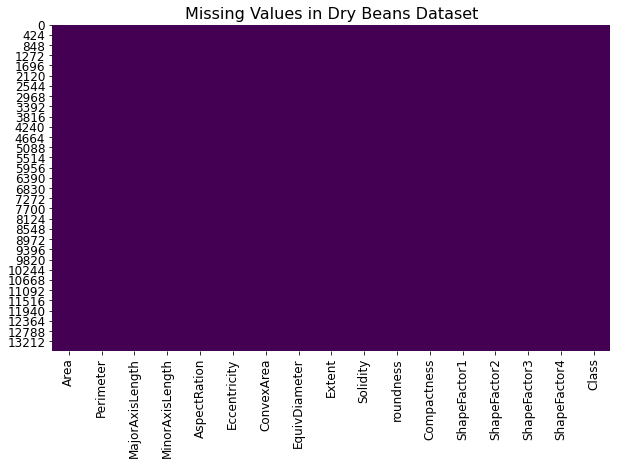

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in Dry Beans Dataset', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)  ## visualizing missing values in dry beans dataset
plt.show()

### EXPLORATORY DATA ANALYSIS

In [14]:
unique_values = df['Class'].unique() ## checking unique values in column Class
print(unique_values)

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


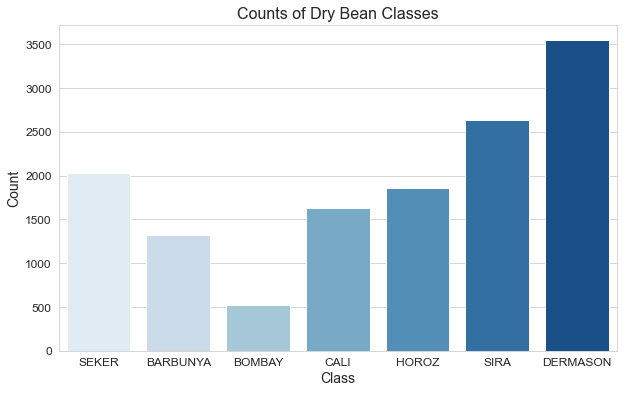

In [15]:
plt.figure(figsize=(10, 6)) ## countplot
sns.set_style("whitegrid")
sns.countplot(x=df['Class'], palette="Blues")
plt.title("Counts of Dry Bean Classes", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [16]:
numerical_df = df.select_dtypes(include=['float64', 'int64']) ## separating numerical features from the categorical

<Figure size 1440x1440 with 0 Axes>

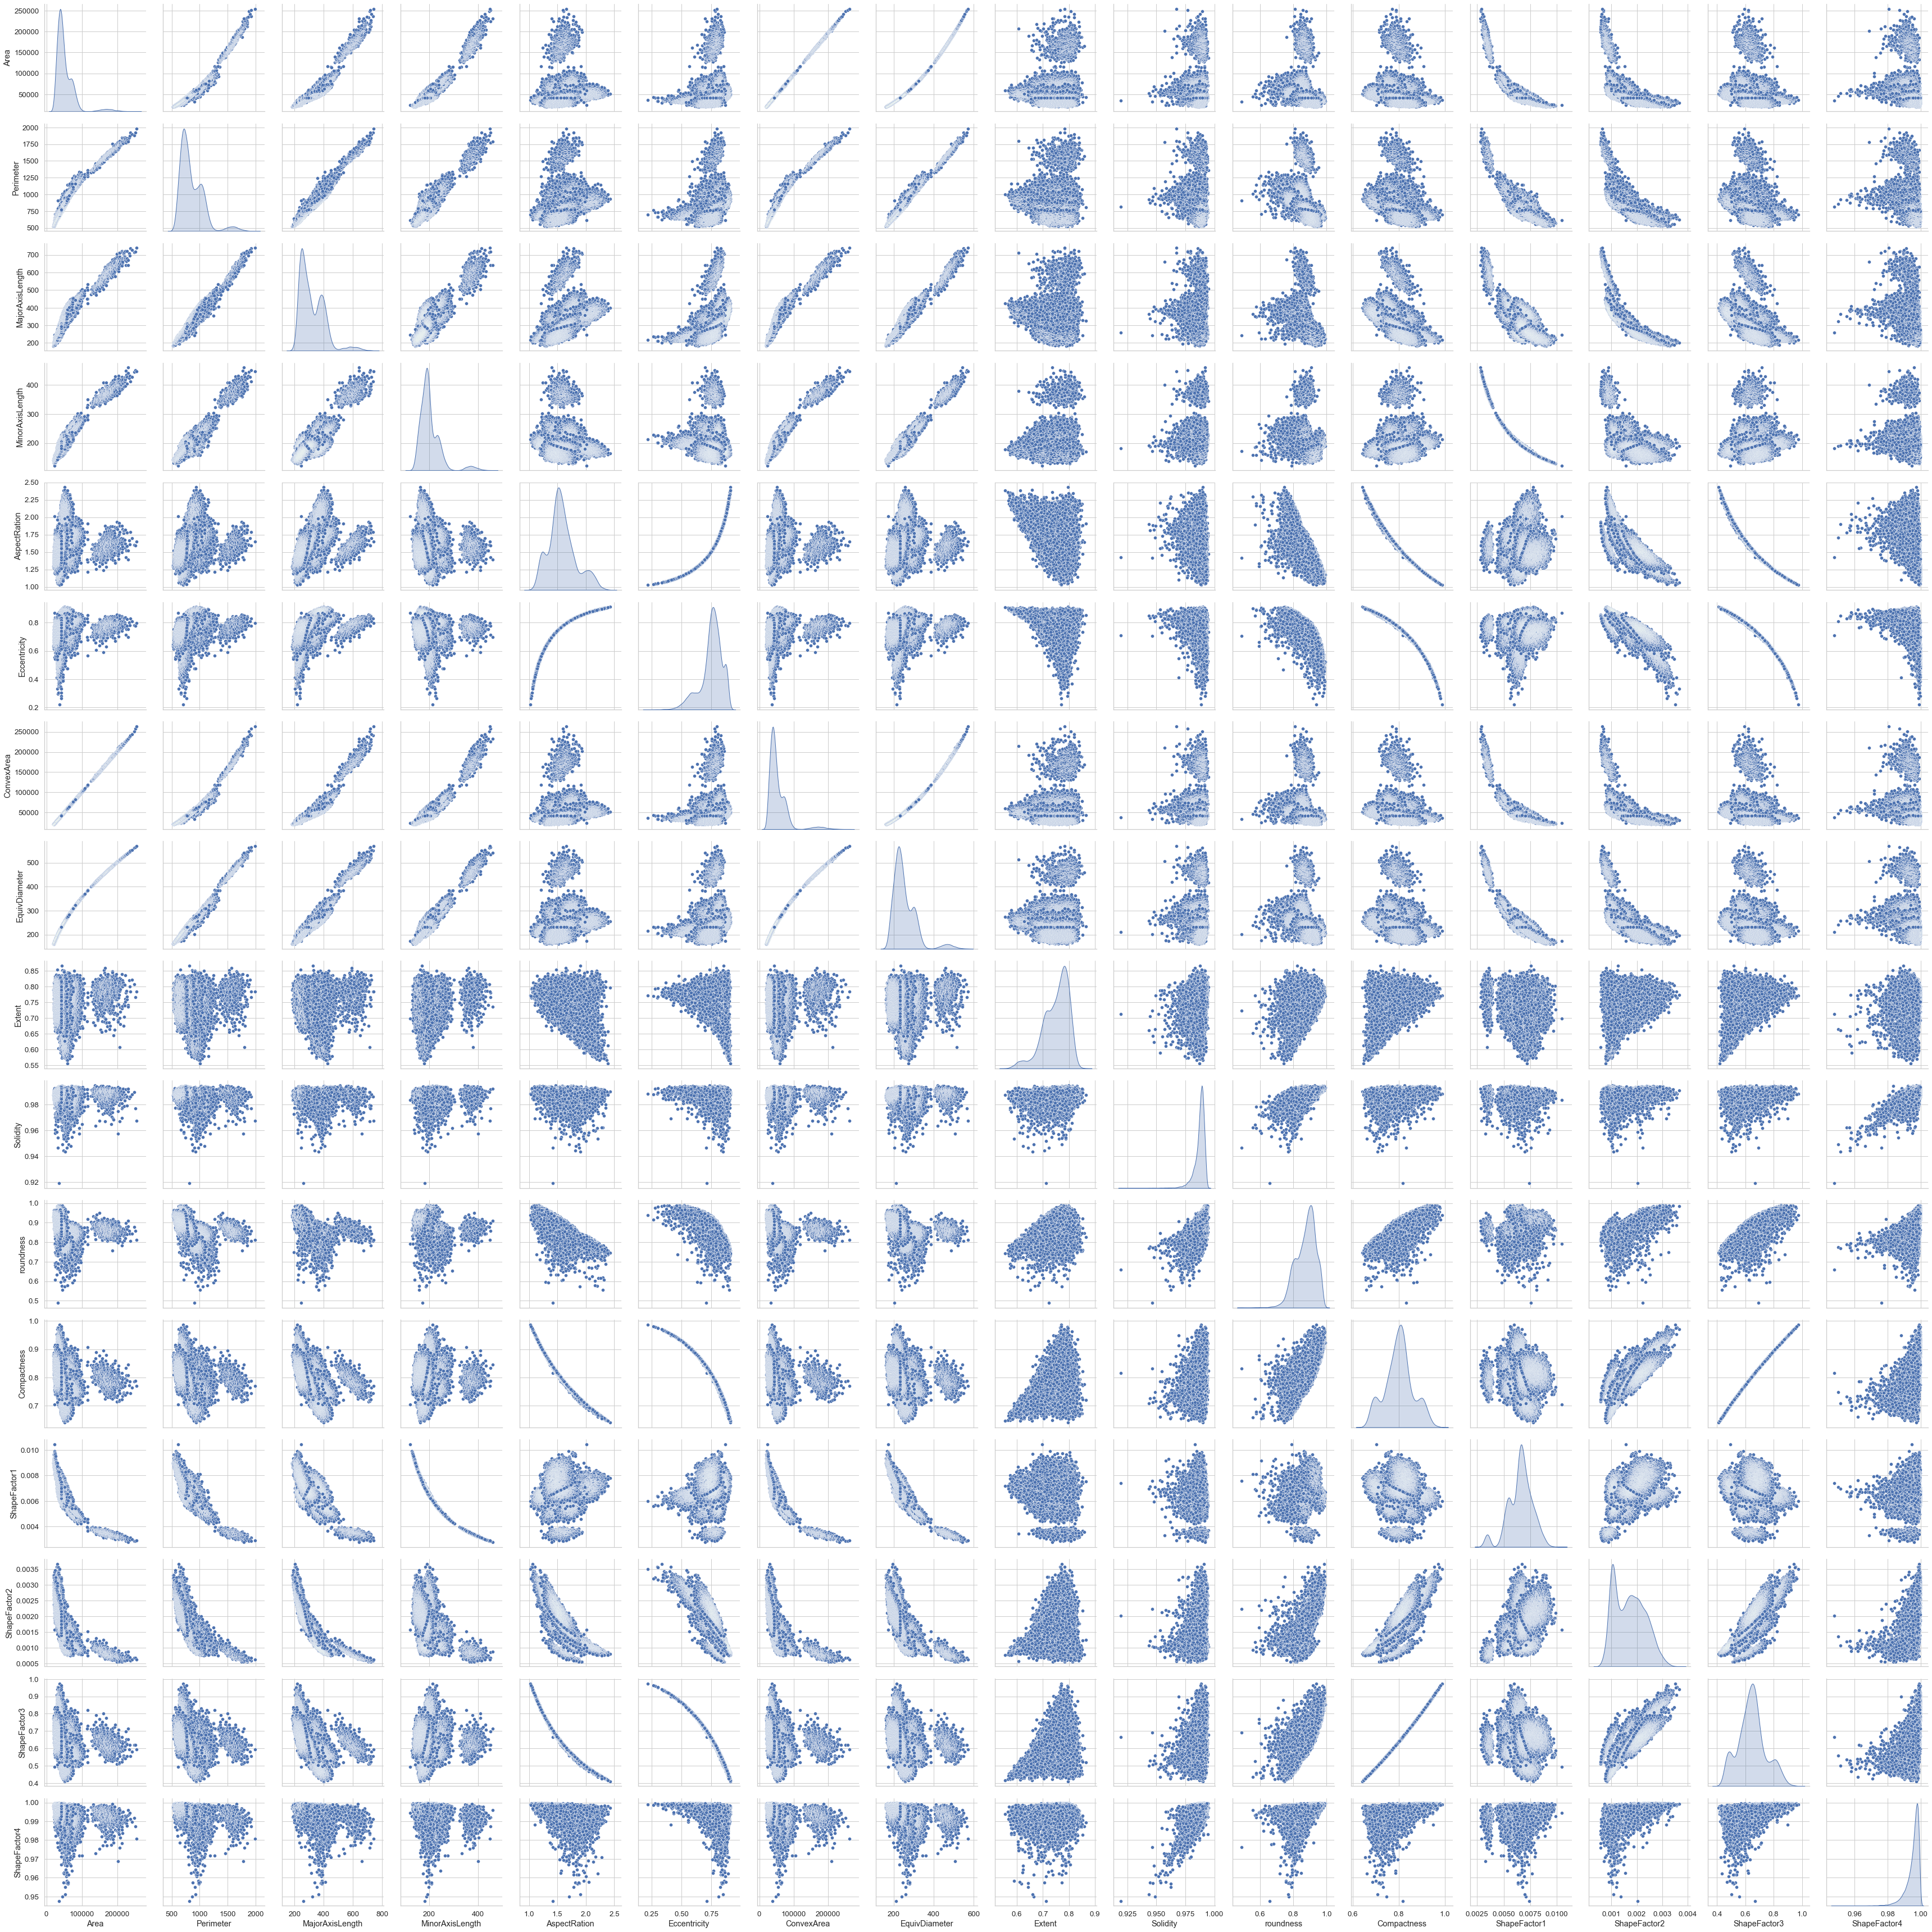

In [17]:
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.pairplot(numerical_df, diag_kind='kde', height=3) ## pairplot
plt.tight_layout()
plt.show()

In [18]:
correlation_matrix = df.corr() ## correlation matrix
correlation_matrix

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966908         0.932623         0.952041   
Perimeter        0.966908   1.000000         0.977561         0.914336   
MajorAxisLength  0.932623   0.977561         1.000000         0.828360   
MinorAxisLength  0.952041   0.914336         0.828360         1.000000   
AspectRation     0.243698   0.386097         0.550075        -0.005354   
Eccentricity     0.268580   0.391062         0.541011         0.022391   
ConvexArea       0.999940   0.967871         0.933392         0.951780   
EquivDiameter    0.984998   0.991453         0.962271         0.949214   
Extent           0.054648  -0.020620        -0.077287         0.145906   
Solidity        -0.197333  -0.304662        -0.284857        -0.156819   
roundness       -0.359068  -0.548336        -0.595710        -0.214090   
Compactness     -0.269797  -0.407426        -0.567902        -0.018618   
ShapeFactor1    -0.848390  -0.865756        -0.775840        -0.947194   
ShapeFactor2    -0.641208  -0.768590        -0.859401        -0.475326   
ShapeFactor3    -0.273754  -0.408888        -0.567607        -0.022744   
ShapeFactor4    -0.358019  -0.431215        -0.484464        -0.266402   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.243698      0.268580    0.999940       0.984998   
Perimeter            0.386097      0.391062    0.967871       0.991453   
MajorAxisLength      0.550075      0.541011    0.933392       0.962271   
MinorAxisLength     -0.005354      0.022391    0.951780       0.949214   
AspectRation         1.000000      0.924185    0.245267       0.305237   
Eccentricity         0.924185      1.000000    0.270350       0.319360   
ConvexArea           0.245267      0.270350    1.000000       0.985255   
EquivDiameter        0.305237      0.319360    0.985255       1.000000   
Extent              -0.371234     -0.319678    0.052864       0.028762   
Solidity            -0.269110     -0.298282   -0.206901      -0.232344   
roundness           -0.764975     -0.720138   -0.363620      -0.437189   
Compactness         -0.987644     -0.970308   -0.271651      -0.328980   
ShapeFactor1         0.020875      0.017266   -0.848382      -0.893403   
ShapeFactor2        -0.837338     -0.859246   -0.642773      -0.714693   
ShapeFactor3        -0.978528     -0.981058   -0.275631      -0.331594   
ShapeFactor4        -0.451598     -0.450611   -0.364302      -0.394693   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.054648 -0.197333  -0.359068    -0.269797     -0.848390   
Perimeter       -0.020620 -0.304662  -0.548336    -0.407426     -0.865756   
MajorAxisLength -0.077287 -0.284857  -0.595710    -0.567902     -0.775840   
MinorAxisLength  0.145906 -0.156819  -0.214090    -0.018618     -0.947194   
AspectRation    -0.371234 -0.269110  -0.764975    -0.987644      0.020875   
Eccentricity    -0.319678 -0.298282  -0.720138    -0.970308      0.017266   
ConvexArea       0.052864 -0.206901  -0.363620    -0.271651     -0.848382   
EquivDiameter    0.028762 -0.232344  -0.437189    -0.328980     -0.893403   
Extent           1.000000  0.192268   0.344510     0.354912     -0.141525   
Solidity         0.192268  1.000000   0.609668     0.304802      0.154346   
roundness        0.344510  0.609668   1.000000     0.765995      0.234158   
Compactness      0.354912  0.304802   0.765995     1.000000     -0.005980   
ShapeFactor1    -0.141525  0.154346   0.234158    -0.005980      1.000000   
ShapeFactor2     0.237584  0.344337   0.781468     0.868347      0.473239   
ShapeFactor3     0.348226  0.308614   0.761012     0.998684     -0.005050   
ShapeFactor4     0.148622  0.700150   0.472776     0.486334      0.251164   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                -0.641208     -0.273754     -0.358019  
Perimeter           -0.768590     -0.408888     -0.431215  
MajorAxisLeng

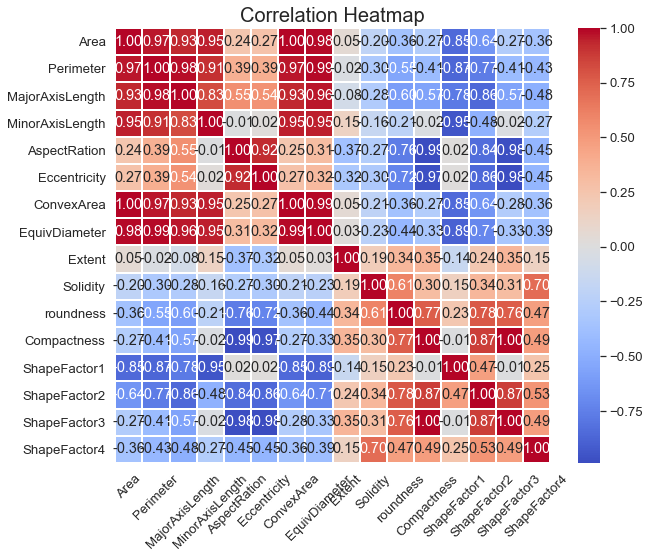

In [19]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            square=True, linewidths=1, linecolor='white')
plt.title('Correlation Heatmap', fontsize=20)              ## heatmap
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

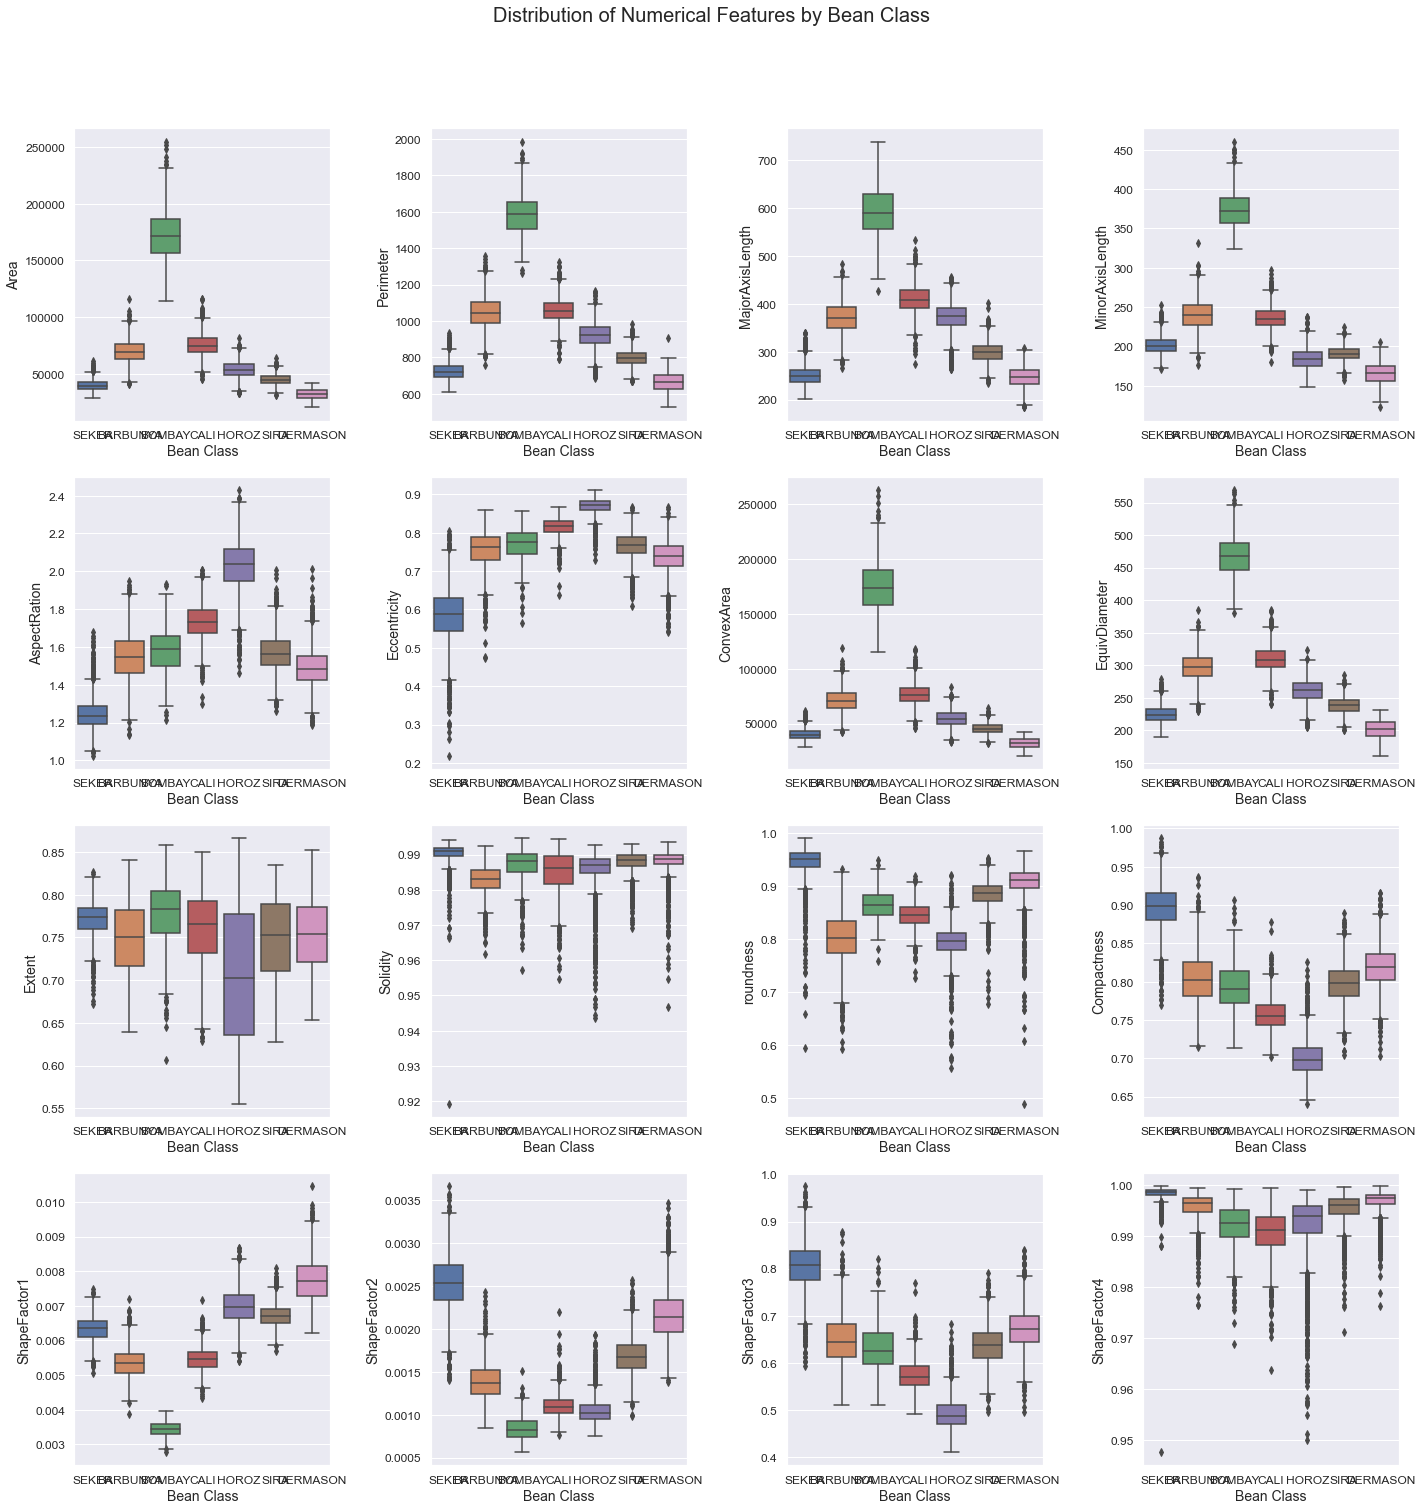

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for ax, col in zip(axes.flat, numerical_df):
    sns.boxplot(x='Class', y=col, data=df, ax=ax) ## boxplots
    ax.set_xlabel('Bean Class', fontsize=14)
    ax.set_ylabel(col, fontsize=14)
    ax.tick_params(labelsize=12)

plt.suptitle('Distribution of Numerical Features by Bean Class', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()


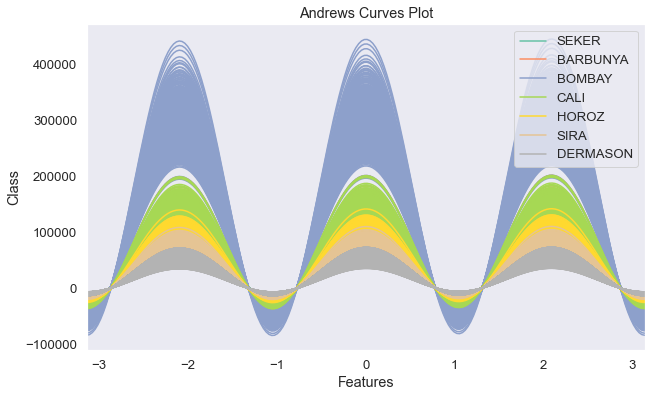

In [21]:
## Setting the figure size
plt.figure(figsize=(10, 6))

## Creating Andrews curves plot
andrews_curves(df, 'Class', colormap=plt.get_cmap("Set2"))

## Adding plot title and axis labels
plt.title("Andrews Curves Plot")
plt.xlabel("Features")
plt.ylabel("Class")

## Showing the plot
plt.show()          

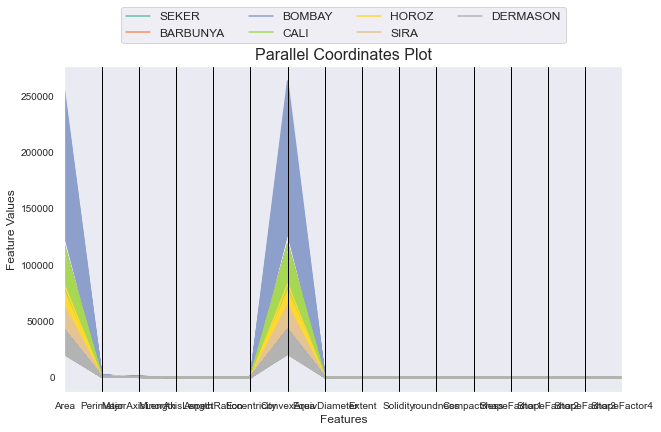

In [22]:
plt.figure(figsize=(10, 6))
parallel_coordinates(df, 'Class', colormap=plt.get_cmap('Set2'))
plt.title('Parallel Coordinates Plot', fontsize=16)                   ## parallel coordinates plot
plt.xlabel('Features', fontsize=12)
plt.ylabel('Feature Values', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4, fontsize=12)
plt.show()

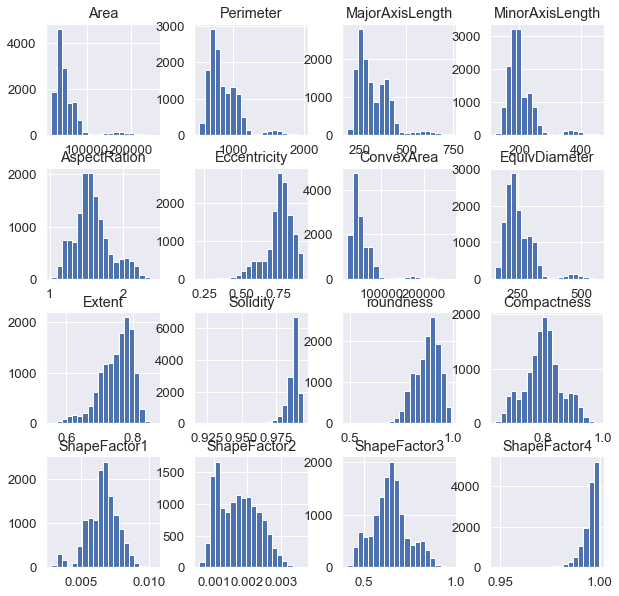

In [23]:
## Plotting histograms of all features
df.hist(figsize=(10,10), bins=20)
plt.show()

### MODELLING WITHOUT FEATURE SCALING AND NORMALIZATION

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Class']), df['Class'], test_size=0.2, random_state=11) ## Splitting the data into training and testing sets

knn = KNeighborsClassifier() ## Creating a KNN classifier object

knn.fit(X_train, y_train) ## Fitting the model to the training data

y_pred = knn.predict(X_test) ## Making predictions on the testing data

accuracy = accuracy_score(y_test, y_pred) ## Evaluating the model's performance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.7220376522702104
Precision: 0.7243565510566088
Recall: 0.7220376522702104
F1-score: 0.7188302070922108


In [25]:
## Splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Class']), df['Class'], test_size=0.2, random_state=11) 


## Defining the range of hyperparameters to search
hyperparameter_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [20, 30, 40],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}



knn = KNeighborsClassifier() ## Creating a KNN classifier object

grid_search = GridSearchCV(knn, hyperparameter_grid, cv=5) ## Creating a GridSearchCV object to search for the best hyperparameters

grid_search.fit(X_train, y_train) ## Fitting the model to the training data using the grid search object

# Getingt the best hyperparameters
best_hyperparameters = grid_search.best_params_ ## Getting the best hyperparameters


knn = KNeighborsClassifier(**best_hyperparameters) ## Creating a KNN classifier object with the best hyperparameters

knn.fit(X_train, y_train) ## Fitting the model to the training data

y_pred = knn.predict(X_test) ## Making predictions on the testing data

## Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.7984496124031008
Precision: 0.8032644408897548
Recall: 0.7984496124031008
F1-score: 0.7972757669461831


In [26]:
y_pred

array(['DERMASON', 'SEKER', 'DERMASON', ..., 'CALI', 'HOROZ', 'BOMBAY'],
      dtype=object)

### MODELLING WITH FEATURE SCALING AND NORMALIZATION

In [27]:
## Feature Selection

correlated_features = set() ## Removing highly correlated features
correlation_matrix = df.drop('Class', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):  
        corr = abs(correlation_matrix.iloc[i, j])
        if corr > 0.8:
            
            column_name = correlation_matrix.columns[i]
            correlated_features.add(column_name)

df.drop(columns=correlated_features, inplace=True)


X = df.drop('Class', axis=1) ## Selecting top features
y = df['Class']
feature_selector = SelectKBest(f_classif, k='all')
feature_selector.fit(X, y)
best_features = X.columns[feature_selector.get_support()]

## Data Scaling and Normalization
## Z-score Normalization
scaler = StandardScaler()
df_final = df[best_features]
df_final[best_features] = scaler.fit_transform(df[best_features]) 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.2, random_state=11) ## Splitting the data into training and testing sets

knn = KNeighborsClassifier() ## Creating a KNN classifier object

knn.fit(X_train, y_train) ## Fitting the model to the training data

y_pred = knn.predict(X_test) ## Making predictions on the testing data

accuracy = accuracy_score(y_test, y_pred) ## Evaluating the model's performance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.9121447028423773
Precision: 0.9125067267806869
Recall: 0.9121447028423773
F1-score: 0.9122429327383047


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_final , y , test_size=0.2, random_state=11) ## Splitting the data into training and testing sets

## Defining the range of hyperparameters to search
hyperparameter_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [20, 30, 40],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}



knn = KNeighborsClassifier() ## Creating a KNN classifier object


grid_search = GridSearchCV(knn, hyperparameter_grid, cv=5) ## Creating a GridSearchCV object to search for the best hyperparameters


grid_search.fit(X_train, y_train) ## Fitting the model to the training data using the grid search object


best_hyperparameters = grid_search.best_params_ ## Getting the best hyperparameters


knn = KNeighborsClassifier(**best_hyperparameters) ## Creating a KNN classifier object with the best hyperparameters


knn.fit(X_train, y_train) ## Fitting the model to the training data


y_pred = knn.predict(X_test) ## Making predictions on the testing data


accuracy = accuracy_score(y_test, y_pred) ## Evaluating the model's performance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.917312661498708
Precision: 0.9183105803484675
Recall: 0.917312661498708
F1-score: 0.9175610776803792


In [30]:
report = classification_report(y_test, y_pred) ## classification report
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       282
      BOMBAY       1.00      1.00      1.00        90
        CALI       0.91      0.94      0.92       315
    DERMASON       0.91      0.90      0.91       702
       HOROZ       0.96      0.94      0.95       376
       SEKER       0.95      0.95      0.95       419
        SIRA       0.84      0.88      0.86       525

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



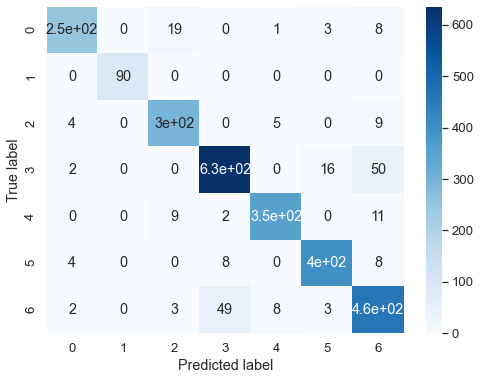

In [31]:
## Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

## Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### ADDITIONAL MODEL

In [32]:

                                                                  ## Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final , y , test_size=0.2, random_state=11)

                                                                  ## Creating a SVM classifier object
svm = SVC()

                                                                 ## Fitting the model to the training data
svm.fit(X_train, y_train)

                                                                 ## Making predictions on the testing data
y_pred = svm.predict(X_test)

                                                                     ## Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9354005167958657
Precision: 0.9359601032427864
Recall: 0.9354005167958657
F1-score: 0.9355369575006551


In [33]:
report = classification_report(y_test, y_pred) ## classification report
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.97      0.93      0.95       282
      BOMBAY       1.00      1.00      1.00        90
        CALI       0.95      0.96      0.95       315
    DERMASON       0.93      0.92      0.93       702
       HOROZ       0.96      0.95      0.96       376
       SEKER       0.95      0.96      0.96       419
        SIRA       0.88      0.91      0.89       525

    accuracy                           0.94      2709
   macro avg       0.95      0.95      0.95      2709
weighted avg       0.94      0.94      0.94      2709



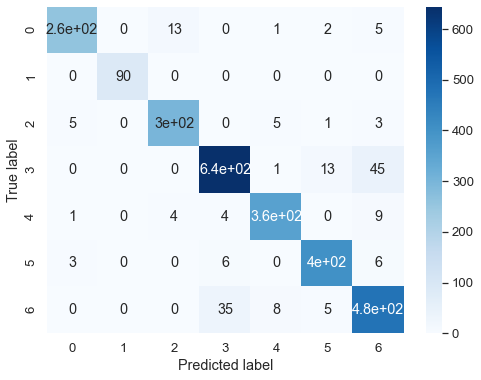

In [34]:
## Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

## Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [35]:
y_pred

array(['DERMASON', 'SEKER', 'DERMASON', ..., 'BARBUNYA', 'HOROZ',
       'BOMBAY'], dtype=object)

In [36]:
## Creating a dataframe with predicted classes
y_pred = svm.predict(X_test)
df = pd.DataFrame({'ID': X_test.index, 'Predicted Class': y_pred})


In [37]:
df

ID Predicted Class
0     10879        DERMASON
1      1160           SEKER
2     10469        DERMASON
3      2169        BARBUNYA
4     10345        DERMASON
...     ...             ...
2704   4410            CALI
2705   9999            SIRA
2706   2529        BARBUNYA
2707   6679           HOROZ
2708   3477          BOMBAY

[2709 rows x 2 columns]

In [38]:
df.to_csv('260769.csv', index=False)